<center>

# Python for Quantum Mechanics: 
# Multiple and Alternative Plots

</center>

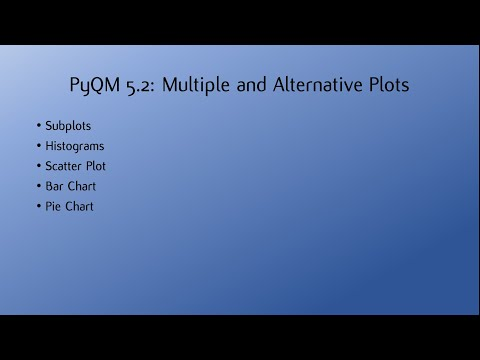

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('842vyBG-apQ',width=700, height=400)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Making sub-plots using `plt.subplot()`

Making multiple plots can often be very useful. There are a number of ways to do this, prehaps the quickest is using `plt.subplot()`. The first two arguments are defining the grid shape (row then column) and the third will be the number within this grid, counting horizontally before vertical as shown. After we have specified the plot we can use the familiar functions we are used to like `plt.plot`, `plt.titles`, etc. The function `plt.suptitle()` can be used to give a title to the entire figure. 

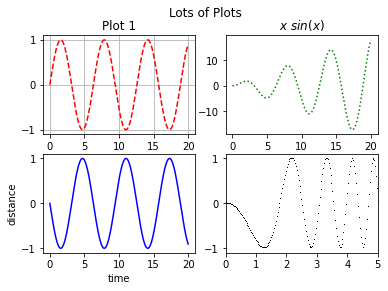

In [3]:
x = np.arange(0,20,.03)

plt.suptitle('Lots of Plots')

plt.subplot(221)
plt.plot(x, np.sin(x), 'r--')
plt.title('Plot 1')
plt.grid()

plt.subplot(2,2,2)
plt.plot(x, x*np.sin(x), 'g:')
plt.title('$x\ sin(x)$')

plt.subplot(223)
plt.plot(x, -np.sin(x), 'b-')
plt.xlabel('time')
plt.ylabel('distance')

plt.subplot(224)
plt.plot(x, -np.sin(x**2), 'k,')
plt.xlim([0,5])

plt.show()

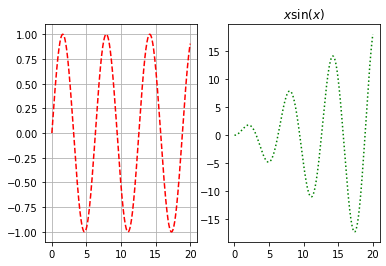

In [4]:
x = np.arange(0,20,.03)

plt.subplot(1,2,1)
plt.plot(x, np.sin(x), 'r--')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, x*np.sin(x), 'g:');
plt.title('$x \sin(x)$')

plt.show()

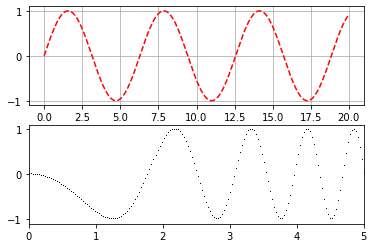

In [5]:
x = np.arange(0,20,.03)

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), 'r--')
plt.grid()

plt.subplot(2,1,2)
plt.plot(x, -np.sin(x**2), 'k,');
plt.xlim([0,5])

plt.show()

## Plots in Plots (plotception)

The above method is indeed very quick and but it is better to create a figure. After this we can simply create two sets of axes. The function `fig.suptitle()` can be used to give a title to the entire figure.

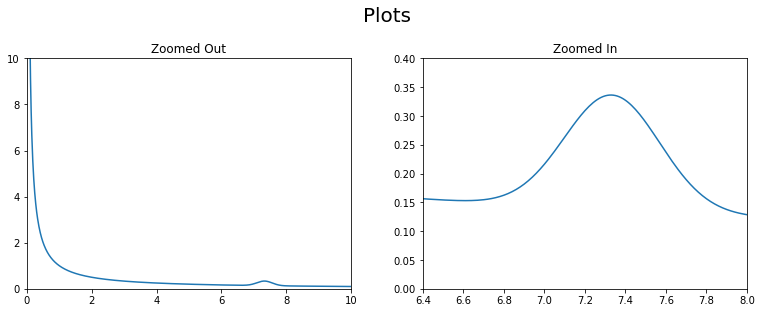

In [6]:
fig = plt.figure(figsize=(10,4))

x = np.arange(.01,10,.01)
y = 1/x + .2*np.exp(-((x*3-22)**2))

fig.suptitle('Plots',size=20)

ax1 = fig.add_axes([0,0,.45,.8])
ax1.plot(x,y)
ax1.set_xlim(0,10)
ax1.set_ylim(0,10)

ax2 = fig.add_axes([0.55, 0, 0.45, .8])
ax2.plot(x,y)
ax2.set_xlim(6.4,8)
ax2.set_ylim(0,.4)

ax1.set_title('Zoomed Out')
ax2.set_title('Zoomed In')

plt.show()

This method is particularly useful when we want to create a plot within another plot. 

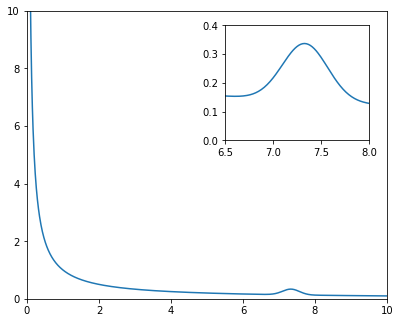

In [7]:
fig = plt.figure(figsize=(5,4))

x = np.arange(.01,10,.01)
y = 1/x + .2*np.exp(-((x*3-22)**2))

ax1 = fig.add_axes([0,0,1,1])
ax1.plot(x,y)
ax1.set_xlim(0,10)
ax1.set_ylim(0,10)

ax2 = fig.add_axes([0.55, 0.55, 0.4, 0.4])
ax2.plot(x,y)
ax2.set_xlim(6.5,8)
ax2.set_ylim(0,.4)

plt.show()

## Making sub-plots using `fig.add_subplot()`

While repeatedly adding axes to the figure does give a lot of control, specifying placement for a lange number of plots could become laborious. The function `fig.add_subplot()` can become very useful for this particulary for iterative creation of plots. `fig.subplots_adjust()` is often necessary to spread the plots out.

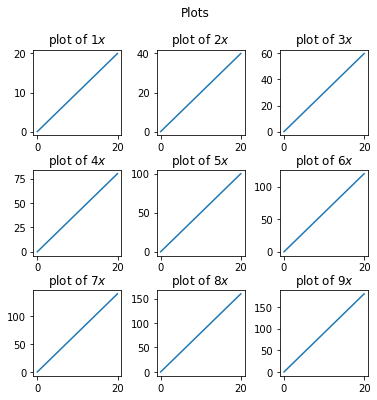

In [8]:
x = np.arange(0,20,.03)

fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Plots')

for i in range(1, 10):
    ax = fig.add_subplot(3, 3, i)
    ax.set_title('plot of $' + str(i) + 'x$')
    ax.plot(x,i*x)
    
plt.show()

## Making sub-plots using `plt.subplots()`

Another method of having the acheving a similar but prehaps more versitile result is to first make an empty figure object using `plt.subplots()` to create a figure object and a tupple of axes within that. As seen below `plt.subplots()` returns both a figure, `fig` and a numpy array of axes, `ax`. Within `plt.subplots()` one can specify the number and shape of axes with `ax`; e.g `plt.subplots(2,1)` creates a figure with two rows with one set axes each. 

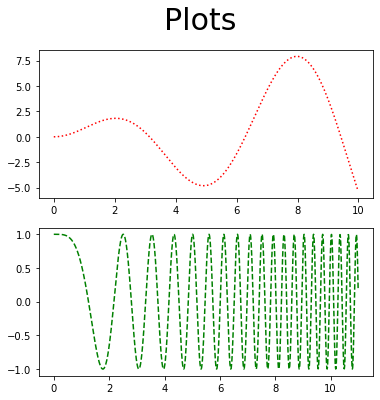

In [9]:
fig, ax = plt.subplots(2,1, figsize=(6,6))

x1 = np.arange(0,10,.01)
x2 = np.arange(0,11,.01)

fig.suptitle('Plots', size = 30)
ax[0].plot(x1, x1*np.sin(x1), 'r:')
ax[1].plot(x2, np.cos(x2**2), 'g--')

plt.show()

It would be nice if these plots lined up and shared a $x$-axis for ease of comparison. This is easily done by setting `sharex=True` when creating the figure. Setting the limit on one of the shared axes will obviously change the limit for the other.

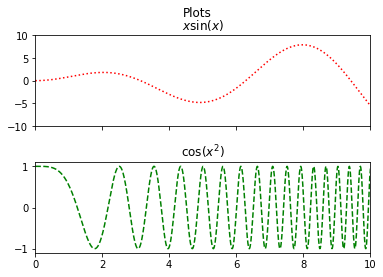

In [10]:
fig,ax = plt.subplots(2,1,sharex=True)

fig.subplots_adjust(hspace=0.4, wspace=0.4)

x1 = np.arange(0,10,.01)
x2 = np.arange(0,11,.01)

fig.suptitle('Plots')
ax[0].plot(x1,x1*np.sin(x1),'r:')
ax[0].set_title('$x\sin(x)$')
ax[0].set_ylim([-10,10])

ax[1].plot(x2,np.cos(x2**2),'g--')
ax[1].set_title('$\cos(x^2)$')
ax[1].set_xlim([0,10])

plt.show()

We can easily share both axes too in a square grid.

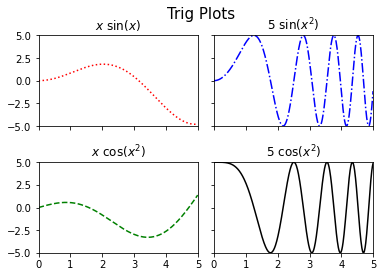

In [11]:
fig,ax = plt.subplots(2,2,sharex=True,sharey=True)

fig.subplots_adjust(hspace=0.4, wspace=0.1)

x = np.arange(0,5,.01)

fig.suptitle('Trig Plots',size=15)
ax[0][0].plot(x,x*np.sin(x),'r:')
ax[0][0].set_title('$x\ \sin(x)$')
ax[0][0].set_ylim([-5,5])

ax[1][0].plot(x,x*np.cos(x),'g--')
ax[1][0].set_title('$x\ \cos(x^2)$')
ax[1][0].set_xlim([0,5])

ax[0][1].plot(x,5*np.sin(x**2),'b-.')
ax[0][1].set_title('$5\ \sin(x^2)$')
ax[0][1].set_xlim([0,5])

ax[1][1].plot(x,5*np.cos(x**2),'k')
ax[1][1].set_title('$5\ \cos(x^2)$')
ax[1][1].set_xlim([0,5])

plt.show()

## Histogram

Histograms can be very useful in exploring qubit output probabilities in quantum computing so they are worth taling note of. The function `plt.hist()` takes in an array of values. You can specify the number intervals over which the data is sampled with the `bins` keyword. What is plotted is either the counts or the percentage of counts (depedning on the `density` keyword) presenting the array in that interval.

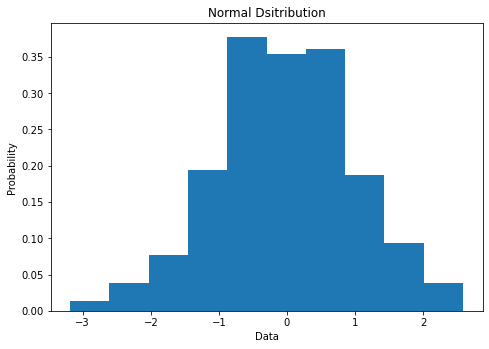

In [12]:
data = np.random.normal(0.0,1.0,500)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(data, density=True, bins=10)
ax.set_title('Normal Dsitribution')
ax.set_ylabel('Probability')
ax.set_xlabel('Data')

plt.show()

There are some other costomizability options for plots that are very useful in histograms.
- `.invert_xaxis()` and `.invert_yaxis()` : Flips either axis.
- `.xaxis.tick_top()` and `.yaxis.tick_right()` : Changes side ticks appear on.
- `.get_shared_x_axes().join(ax1, ax2)` and `.get_shared_y_axes().join(ax1, ax2)` : Creates a link between the two axes so that they scale together. This is useful if the axes have been created seperately by `fig.add_axes()` as opposed to and subplot technique.
The `orientation` keyword can be changed to `'horizontal'` to flip the chart on its side.

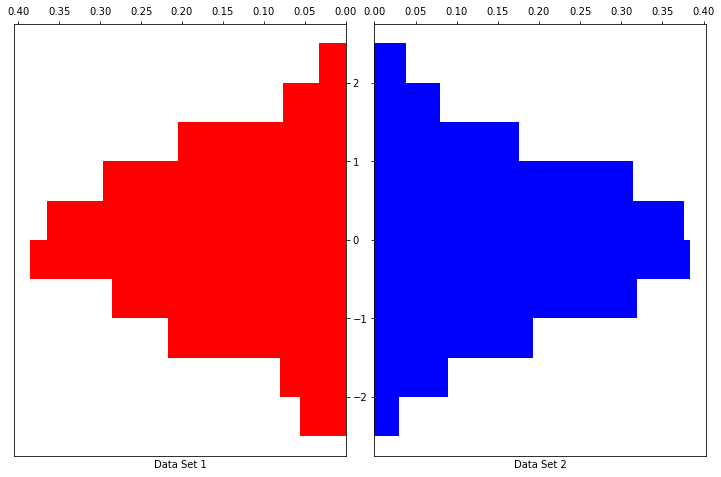

In [13]:
data1 = np.random.normal(0.0,1.0,500)
data2 = np.random.normal(0.0,1.0,5000)

bin_array = np.arange(-2.5,3,.5)

fig = plt.figure(figsize = (10,6))

ax1 = fig.add_axes([0,.5,.46,1])
ax1.hist(data1, density=True, bins=bin_array, color='r', orientation='horizontal')
ax1.set_xlabel('Data Set 1')

ax2 = fig.add_axes([.5,.5,.46,1])
ax2.hist(data2, density=True, bins=bin_array, color='b', orientation='horizontal')
ax2.set_xlabel('Data Set 2')

ax2.xaxis.tick_top()
ax1.xaxis.tick_top()
ax1.yaxis.tick_right()

ax2.get_shared_y_axes().join(ax1, ax2)
ax1.invert_xaxis()
ax2.set_yticklabels([])

plt.show()

## Scatter

We have seen `plt.plot()` where you remove the lines between the points but prehaps a better way of diaplaying the same thing is using `plt.scatter()`.

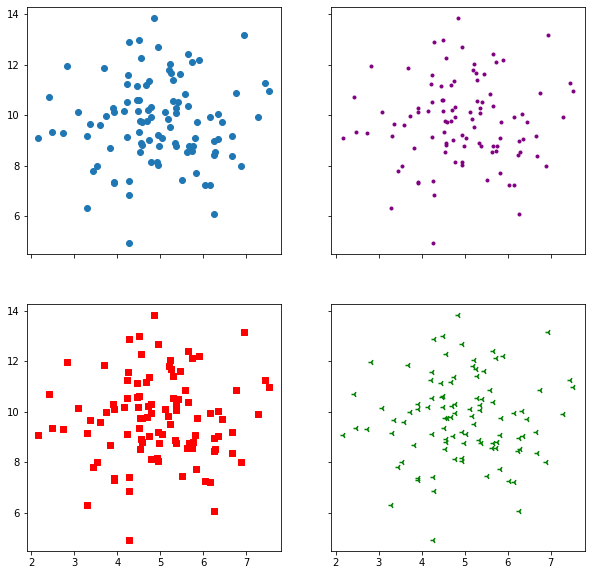

In [14]:
x = np.random.normal(5.0, 1.0, 100)
y = np.random.normal(10.0, 2.0, 100)

fig,ax = plt.subplots(2, 2, figsize = (10,10),sharex=True, sharey=True)

ax[0,0].scatter(x, y)
ax[0,1].scatter(x, y, color = 'purple', marker = '.')
ax[1,0].scatter(x, y, color = 'r', marker = ',')
ax[1,1].scatter(x, y, color = 'green', marker = '3')

plt.show()

## Bar Chart

$x$-axis bar charts can be created using `plt.bar()`. This takes in an array of labels and an array of values for the labeled bars to take.

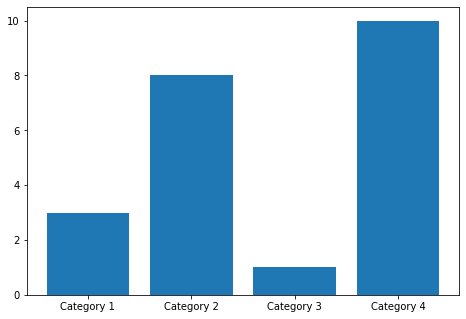

In [15]:
categories = np.array(["Category 1", "Category 2", "Category 3", "Category 4"])
values = np.array([3, 8, 1, 10])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(categories,values)

plt.show()

Their appearence can be changed using the `color` and `width` keywords among others.

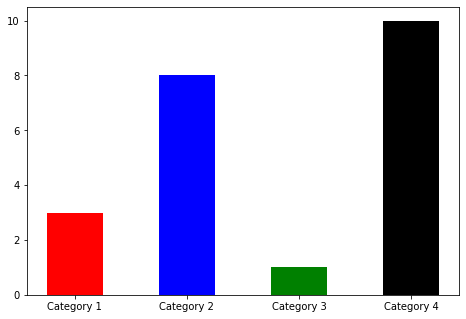

In [16]:
colours = ['r','b','g','k']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(categories,values,width=0.5,color=colours)

plt.show()

$y$-axis bar charts can be created using `plt.barh()`.

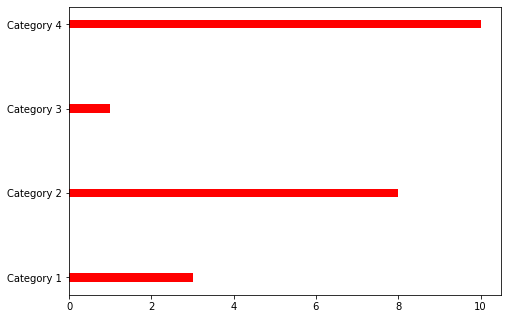

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.barh(categories,values,height=0.1,color='r')

plt.show()

## Pie Chart

The function `plt.pie()` is used similarly to `plt.bar()` to create a pie chart. The proportions, `labels` and `colors` are specified.

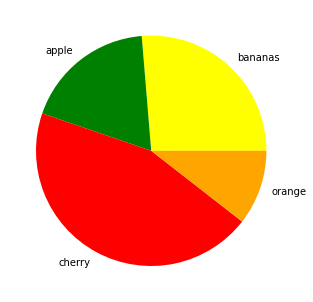

In [18]:
nums=[10,7,17,4]
fruits=['bananas','apple','cherry','orange']
fruit_colours=['yellow','green','red','orange']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(nums, labels=fruits, colors=fruit_colours)

plt.show() 

Using the `explode` keyword we can highlight and seperate the segments. This is set to a list or numpy array with the same length as the number of segments that sets how seperated each segment is.

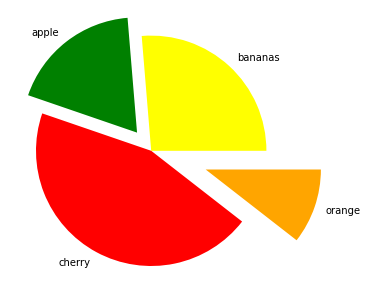

In [19]:
fruit_explosion=[0,0.2,0,.5]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(nums, labels=fruits, colors=fruit_colours, explode=fruit_explosion)

plt.show() 

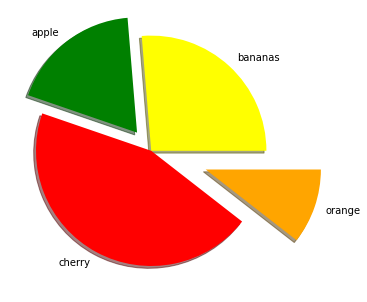

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(nums, labels=fruits, colors=fruit_colours, explode=fruit_explosion, shadow = True)

plt.show() 